# Задание 1

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Загрузка датасета
data = fetch_california_housing()

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Создание глубокой нейронной сети
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Оценка модели на тестовых данных
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score}')


Epoch 1/100
516/516 [==============================] - 4s 6ms/step - loss: 0.8340 - val_loss: 0.4260
Epoch 2/100
516/516 [==============================] - 3s 6ms/step - loss: 0.4251 - val_loss: 0.3788
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3651 - val_loss: 0.3598
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3545 - val_loss: 0.3474
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3424 - val_loss: 0.3407
Epoch 6/100
516/516 [==============================] - 2s 3ms/step - loss: 0.3294 - val_loss: 0.3398
Epoch 7/100
516/516 [==============================] - 1s 3ms/step - loss: 0.3256 - val_loss: 0.3314
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.3287
Epoch 9/100
516/516 [==============================] - 1s 3ms/step - loss: 0.3069 - val_loss: 0.3124
Epoch 10/100
516/516 [==============================] - 2s 3ms/step - loss: 0.3088 - val_lo

# Задание 2

In [1]:
# импортируем Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


# Задание 2 (подготовка датасета)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/pizza/
%cd /content/drive/MyDrive/steak/
%cd /content/drive/MyDrive/sushi/

/content/drive/MyDrive/pizza
/content/drive/MyDrive/steak
/content/drive/MyDrive/sushi


In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/pizza/")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/steak/")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/sushi/")))

In [ ]:
import os
import shutil
import random
from imutils import paths

# Создание папки food, если ее не существует
if not os.path.exists('/content/drive/MyDrive/food'):
    os.makedirs('/content/drive/MyDrive/food')

# Объединение файлов из папок pizza, steak и sushi в одну папку food
imagePaths = []
for folder_name in ['pizza', 'steak', 'sushi']:
    folder_path = '/content/drive/MyDrive/' + folder_name
    imagePaths += list(paths.list_images(folder_path))

random.shuffle(imagePaths)

for imagePath in imagePaths:
    file_name = imagePath.split(os.path.sep)[-1]
    dst_path = '/content/drive/MyDrive/food/' + file_name
    shutil.copyfile(imagePath, dst_path)


In [ ]:
# цикл по изображениям
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=1000)

Epoch 1/80
3/3 [==============================] - 2s 406ms/step - loss: 1.1382 - accuracy: 0.3327 - val_loss: 1.0922 - val_accuracy: 0.3782
Epoch 2/80
3/3 [==============================] - 1s 288ms/step - loss: 1.0771 - accuracy: 0.4029 - val_loss: 1.0477 - val_accuracy: 0.4647
Epoch 3/80
3/3 [==============================] - 1s 268ms/step - loss: 1.0406 - accuracy: 0.4616 - val_loss: 1.0440 - val_accuracy: 0.4314
Epoch 4/80
3/3 [==============================] - 1s 272ms/step - loss: 1.0154 - accuracy: 0.4949 - val_loss: 1.0055 - val_accuracy: 0.5153
Epoch 5/80
3/3 [==============================] - 1s 495ms/step - loss: 0.9901 - accuracy: 0.5224 - val_loss: 0.9875 - val_accuracy: 0.5180
Epoch 6/80
3/3 [==============================] - 1s 452ms/step - loss: 0.9765 - accuracy: 0.5406 - val_loss: 0.9830 - val_accuracy: 0.4967
Epoch 7/80
3/3 [==============================] - 1s 439ms/step - loss: 0.9586 - accuracy: 0.5473 - val_loss: 0.9641 - val_accuracy: 0.5379
Epoch 8/80
3/3 [====

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

       pizza       0.60      0.51      0.55       245
       steak       0.75      0.66      0.70       269
       sushi       0.49      0.62      0.55       237

    accuracy                           0.60       751
   macro avg       0.61      0.60      0.60       751
weighted avg       0.62      0.60      0.60       751



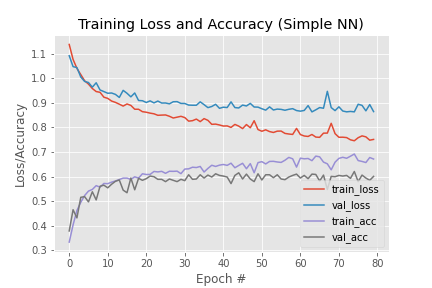

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))


In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving 1033302.jpg to 1033302 (1).jpg


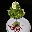

In [ ]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [ ]:
# загружаем модель и бинаризатор меток
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [ ]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 65ms/step
[[0.3178717 0.3536609 0.3284675]]


In [ ]:
# находим индекс метки класса с наибольшей вероятностью соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [ ]:
# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 6,  8,  9],
        [ 6,  8,  9],
        [ 6,  8,  9]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 5,  7,  8],
        [ 5,  7,  8],
        [ 5,  7,  8]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 4,  6,  7],
        [ 4,  6,  7],
        [ 4,  6,  7]],

       ...,

       [[ 7,  9, 10],
        [ 6,  8,  9],
        [ 5,  7,  8],
        ...,
        [ 9, 11, 12],
        [ 9, 11, 12],
        [ 9, 11, 12]],

       [[ 8, 10, 11],
        [ 7,  9, 10],
        [ 6,  8,  9],
        ...,
        [ 8, 10, 11],
        [ 8, 10, 11],
        [ 9, 11, 12]],

       [[ 8, 10, 11],
        [ 7,  9, 10],
        [ 6,  8,  9],
        ...,
        [ 8, 10, 11],
        [ 8, 10, 11],
        [ 8, 10, 11]]], dtype=uint8)

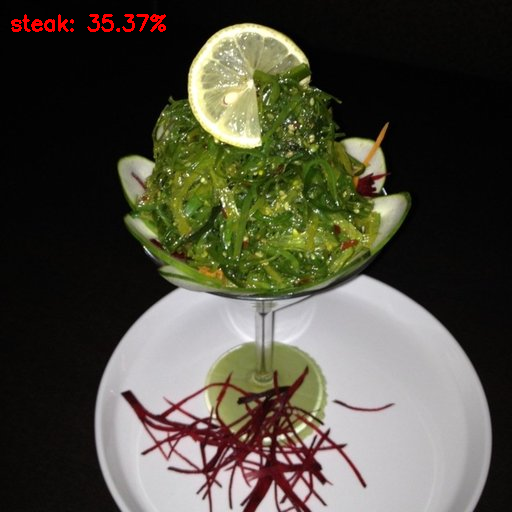

In [ ]:
cv2_imshow(output)